In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


<AxesSubplot:>

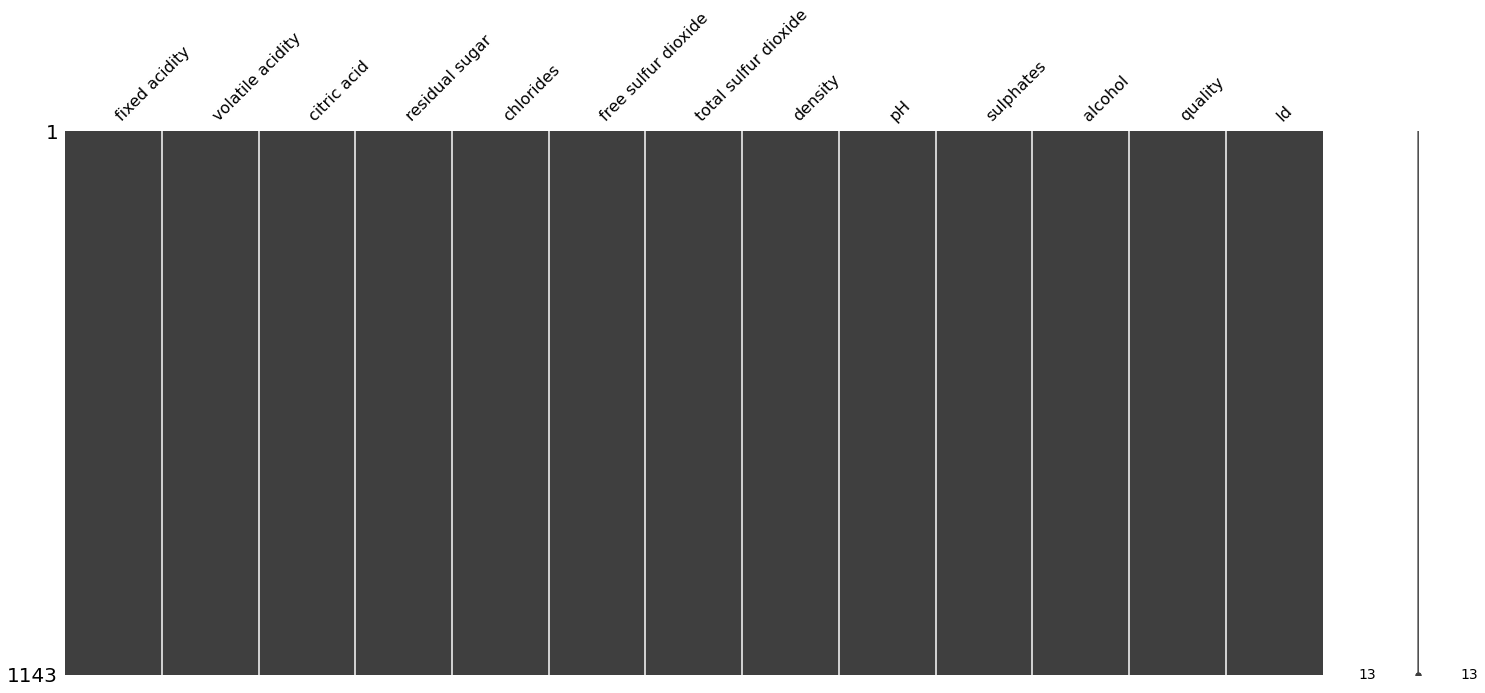

In [2]:
veri = pd.read_csv("../input/wine-quality-dataset/WineQT.csv")

import missingno as msno
msno.matrix(veri)

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

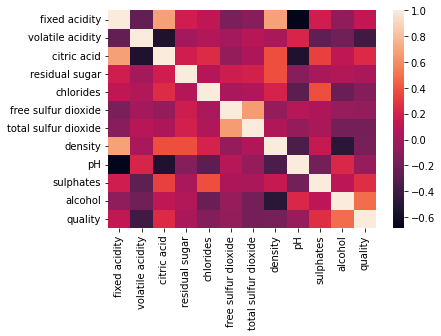

In [3]:
veri = veri.drop(["Id"],axis=1)
corr = veri.corr()
sns.heatmap(corr)
corr = corr.iloc[:,-1]
corr

In [4]:
#veri = veri.drop(["free sulfur dioxide"],axis=1)

In [5]:
#Separating
Y = veri["quality"]
X = veri.drop(["quality"],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
pd.DataFrame 

pandas.core.frame.DataFrame

In [6]:
#Scaling
mms = MinMaxScaler()
xtrain_s = mms.fit_transform(xtrain)
xtrain_s = pd.DataFrame(xtrain_s)
xtest_s = mms.fit_transform(xtest)

In [7]:
knn = KNeighborsClassifier()
svc = SVC()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
clfer = [knn,svc,rfc,dtc,lr]

#for clf in clfer:
#    clf.fit(xtrain_s,ytrain)
knn.fit(xtrain_s,ytrain)
svc.fit(xtrain_s,ytrain)
dtc.fit(xtrain_s,ytrain)
rfc.fit(xtrain_s,ytrain)
lr.fit(xtrain_s,ytrain)

lrp = lr.predict(xtest_s)
knnp = knn.predict(xtest_s)
rfcp = rfc.predict(xtest_s)
dtcp = dtc.predict(xtest_s)
svcp = svc.predict(xtest_s)

predicts = [lrp,svcp,knnp,rfcp,dtcp]

for i in predicts:
    a = accuracy_score(i,ytest)
    print("Accuracy score :",a)
for j in predicts:   
    b = balanced_accuracy_score(j,ytest)
    print("Balanced accuracy score :",b)  





Accuracy score : 0.5589519650655022
Accuracy score : 0.5676855895196506
Accuracy score : 0.5109170305676856
Accuracy score : 0.5851528384279476
Accuracy score : 0.42358078602620086
Balanced accuracy score : 0.5825201825201826
Balanced accuracy score : 0.5090643274853801
Balanced accuracy score : 0.3362173816895179
Balanced accuracy score : 0.6026785714285715
Balanced accuracy score : 0.21994631185807656
